# Andres Felipe Rincon Prieto

# 1. Clasificación del cancer del seno

In [26]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [27]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.3.0


In [28]:
# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Preprocesamiento

In [29]:
x = data.iloc[:,2:].values # extrae como tensores numpy
y = data.iloc[:,1].values

# Recodifica la variable objetivo

In [30]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Dividir los datos entre entrenamiento y test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)


In [32]:
x_test.shape

(57, 30)

# Normaliza los datos

In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Crear un modelo Sequential modo 2

In [34]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compila

In [35]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


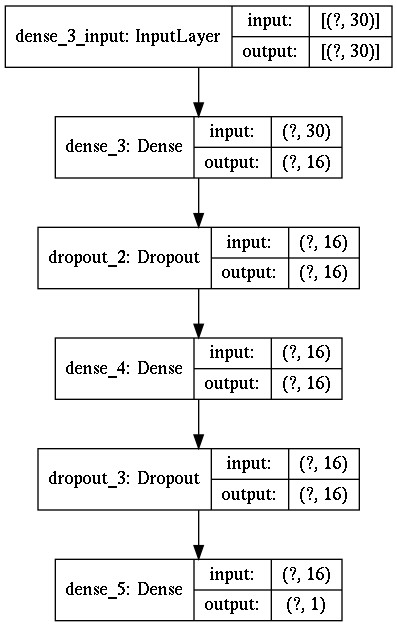

In [36]:
classifier.summary()
plot_model(classifier, to_file='cancer_seno.png', 
           show_shapes=True)

# Entrenamiento

In [37]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 0s 10ms/step - loss: 0.6278 - accuracy: 0.6919 - val_loss: 0.5395 - val_accuracy: 0.7864
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8020 - val_loss: 0.4453 - val_accuracy: 0.8641
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 0.4259 - accuracy: 0.8680 - val_loss: 0.3717 - val_accuracy: 0.8835
Epoch 4/150
13/13 [==============================] - 0s 7ms/step - loss: 0.3698 - accuracy: 0.8949 - val_loss: 0.3124 - val_accuracy: 0.9029
Epoch 5/150
13/13 [==============================] - 0s 6ms/step - loss: 0.3126 - accuracy: 0.9095 - val_loss: 0.2633 - val_accuracy: 0.9223
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2613 - accuracy: 0.9120 - val_loss: 0.2244 - val_accuracy: 0.9320
Epoch 7/150
13/13 [==============================] - 0s 6ms/step - loss: 0.2290 - accuracy: 0.9315 - val_loss: 0.1941 - val_accuracy: 0.9417
Epoch 8/150


# Predicciones

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

# Matriz de confusión

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [40]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 98.24561403508771%


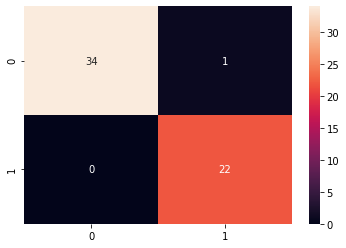

In [41]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

# Evaluación del modelo

In [42]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

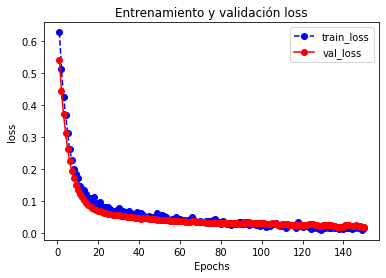

In [43]:
plot_metric(history, 'loss')

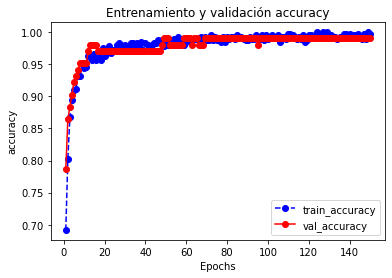

In [44]:
plot_metric(history, 'accuracy')

# 2. Predecir el precio de las viviendas

# Librerias

In [129]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model


import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




print(tf.__version__)

2.3.0


# Lectura de datos

In [130]:
# Importing data
data2 = pd.read_csv('HousingData.csv')
data2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [131]:
data2.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [132]:
data2 = data2.dropna()

# Dividir los datos en entrenamiento y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas.

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.


In [133]:
train_dataset = data2.sample(frac=0.8,random_state=0) #genera una muestra con 80% de los datos
test_dataset = data2.drop(train_dataset.index)  #validacion

In [134]:
train_dataset.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Descriptivo de los datos

Revise rapidamente la distribucion conjunta de un par de columnas de el set de entrenamiento.


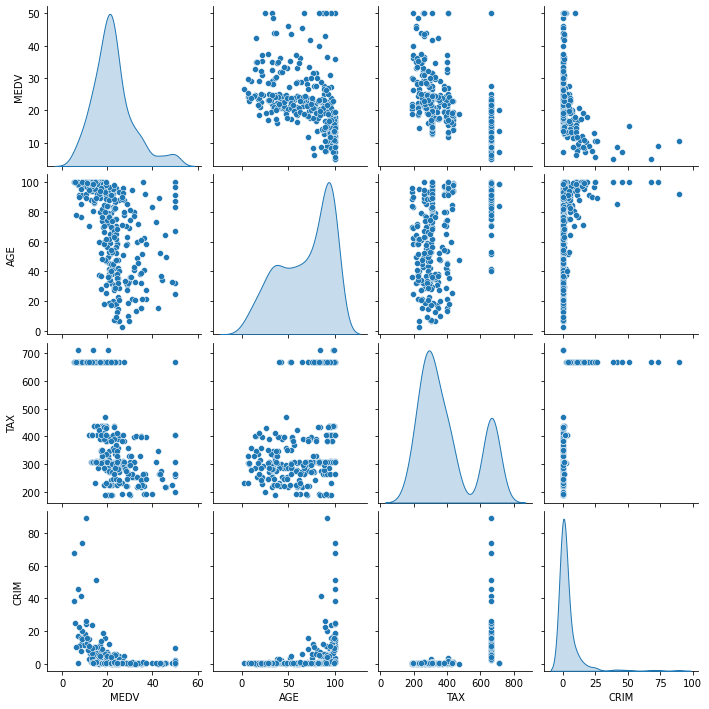

In [135]:
sns.pairplot(train_dataset[["MEDV", "AGE", "TAX", "CRIM"]], diag_kind="kde")

Tambien revise las estadisticas generales:


In [136]:
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,315.0,3.729713,9.851193,0.00632,0.073735,0.24522,2.756855,88.9762
ZN,315.0,12.179365,24.618918,0.00000,0.000000,0.00000,15.000000,95.0000
INDUS,315.0,10.843968,6.880035,0.46000,4.940000,8.56000,18.100000,27.7400
CHAS,315.0,0.060317,0.238453,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,315.0,0.550091,0.112438,0.38900,0.449000,0.53800,0.619000,0.8710
RM,315.0,6.271790,0.671474,3.56100,5.884500,6.19500,6.577000,8.7250
AGE,315.0,68.060000,27.905166,2.90000,44.350000,75.00000,93.950000,100.0000
DIS,315.0,3.855930,2.086667,1.16910,2.120350,3.31750,5.250950,12.1265
RAD,315.0,9.177778,8.555187,1.00000,4.000000,5.00000,8.000000,24.0000
TAX,315.0,401.307937,166.486559,187.00000,279.000000,329.00000,666.000000,711.0000


Se separa caracteristicas y etiquetas

Se separa el valor objetivo, o la "etiqueta" de las caracteristicas. Esta etiqueta es el valor que entrenara el modelo para predecir.


In [137]:
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

# Normalizacion de los datos



In [138]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Construcción del modelo Sequential modo 1

In [139]:
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=(normed_train_data.shape[1],)),
layers.Dense(64, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(8, activation='relu'),
layers.Dense(1)
])

# Compila

In [140]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

# Summary

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 6,241
Trainable params: 6,241
Non-trainable params: 0
_________________________________________________________________


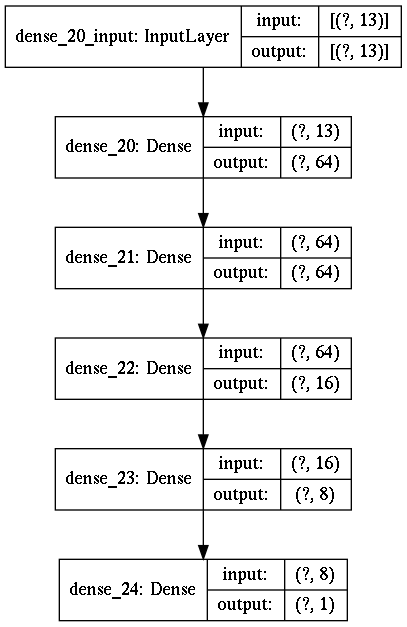

In [141]:
model.summary()
plot_model(model, to_file='redes.png', 
           show_shapes=True)

# Entrenamiento

Entrenar el modelo durante 1000 epochs y registre la precisión de entrenamiento y validación en el objeto history.


In [142]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

epochs = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=epochs, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [143]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.878613,0.729414,0.878613,9.470106,2.378458,9.470106,995
996,0.574740,0.560565,0.574740,9.414880,2.360088,9.414880,996
997,0.843374,0.765152,0.843374,9.652677,2.436737,9.652677,997
998,0.662727,0.620597,0.662727,9.588297,2.370417,9.588297,998
999,0.822987,0.735656,0.822987,9.697085,2.357530,9.697085,999


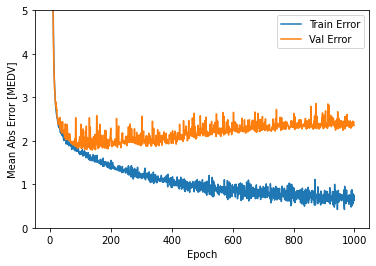

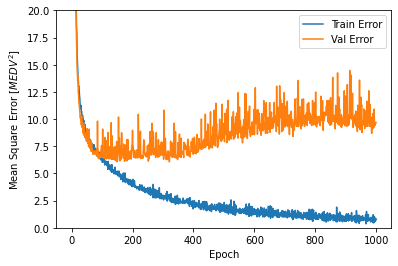

In [144]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


.................

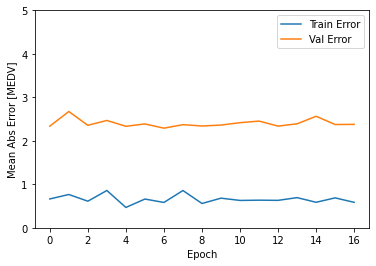

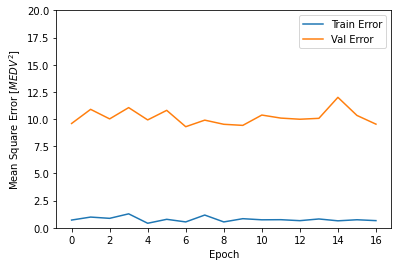

In [145]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=epochs,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [146]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 28.2086 - mae: 3.0331 - mse: 28.2086
Testing set Mean Abs Error:  3.03 MPG


# Predicciones

Finalmente, prediga los valores de MVE utilizando datos en el conjunto de pruebas:


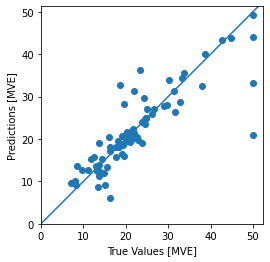

In [147]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MVE]')
plt.ylabel('Predictions [MVE]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


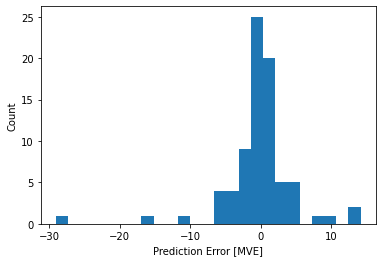

In [148]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MVE]")
_ = plt.ylabel("Count")